In [1]:
import pandas as pd
import numpy as np
import sympy as sym
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt


In [2]:
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
from os.path import join

from numpy import ones, pi, array, linspace, cos, sqrt

from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.OPdq import OPdq
from pyleecan.Classes.MagFEMM import MagFEMM

# #1. Load Data from Pyleecan

C:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\pyleecan\Methods\Machine\Machine\plot.py:130: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


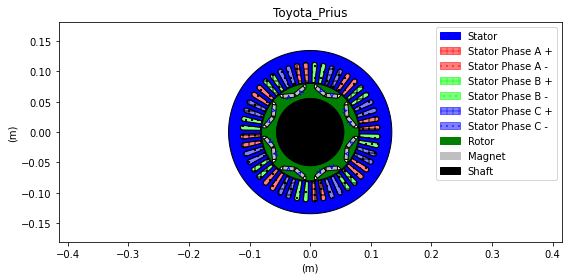

In [3]:

IPMSM_A = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))
IPMSM_A.plot()

# #2. check hierachy of machine data in pyleecan packgage

4


c:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\pyleecan\Methods\Machine\LamSlotWind\plot.py:192: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


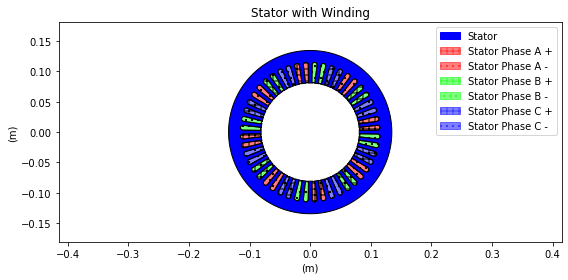

In [223]:
# check hierachy of machine data in pyleecan packgage

qs = simu_femm.machine.stator.winding.qs
print(p)
# simu_femm.machine.stator.plot_winding()
# dir(simu_femm.machine.stator.plot())
simu_femm.machine.stator.plot()


In [4]:
#check regarding operating point
dir(simu_femm.input)

print(simu_femm.input.Nrev)
print(simu_femm.input.OP)
dir(simu_femm.input.OP)
type(simu_femm.input.OP)

print(dir(simu_femm.input))

NameError: name 'simu_femm' is not defined

In [225]:
simu_femm.input = InputCurrent()
print(dir(simu_femm.input))

['Ir', 'Is', 'Na_tot', 'Nrev', 'Nt_tot', 'OP', 'PWM', 'VERSION', '_FrozenClass__isfrozen', '_Ir', '_Is', '_Na_tot', '_Nrev', '_Nt_tot', '_OP', '_PWM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_angle', '_angle_rotor_initial', '_current_dir', '_freeze', '_get_Ir', '_get_Is', '_get_Na_tot', '_get_Nrev', '_get_Nt_tot', '_get_OP', '_get_PWM', '_get_angle', '_get_angle_rotor_initial', '_get_current_dir', '_get_phase_dir', '_get_rot_dir', '_get_time', '_phase_dir', '_rot_dir', '_set_Ir', '_set_Is', '_set_Na_tot', '_set_None', '_set_Nrev', '_set_Nt_tot', '_set_OP', '_set_PWM', '_set_angle', '_set_angle_rotor_initial', '_set_current_dir', '_set_phase_dir', '_set_rot_dir', '_set_time', '_time', 'a

In [258]:

N0 = 3000 
rpm=10000
rrpm=2000
fre_e=(rrpm/60.)*poles/2
simu_femm.input.OP = OPdq(N0=N0)

## Information regarding Design (machine & winding) geometric

In [259]:
# poles=12
# slot=72
# Information regarding Design (machine & winding) geometric
p = simu_femm.machine.stator.winding.p
poles=2*p
slot=simu_femm.machine.stator.slot.Zs

# Calculation FEMM

In [5]:
from os.path import join

from numpy import ones, pi, array, linspace, cos, sqrt

from pyleecan.Classes.Simu1 import Simu1
from pyleecan.Classes.InputCurrent import InputCurrent
from pyleecan.Classes.OPdq import OPdq
from pyleecan.Classes.MagFEMM import MagFEMM

# Create the Simulation
simu_femm = Simu1(name="FEMM_simulation", machine=IPMSM_A)   
p = simu_femm.machine.stator.winding.p
qs = simu_femm.machine.stator.winding.qs

# Defining Simulation Input
simu_femm.input = InputCurrent()

# Rotor speed [rpm]
N0 = 1500 
simu_femm.input.OP = OPdq(N0=N0)

# time discretization [s]
time = linspace(start=0, stop=60/N0, num=32*p, endpoint=False) # 32*p timesteps
simu_femm.input.time = time 

# Angular discretization along the airgap circonference for flux density calculation
simu_femm.input.angle = linspace(start = 0, stop = 2*pi, num=2048, endpoint=False) # 2048 steps 

# Stator currents as a function of time, each column correspond to one phase [A]
I0_rms = 250/sqrt(2) 
felec = p * N0 /60 # [Hz]
rot_dir = simu_femm.machine.stator.comp_mmf_dir()
Phi0 = 140*pi/180  # Maximum Torque Per Amp

Ia = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 0 * rot_dir * 2 * pi / qs + Phi0)
)
Ib = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 1 * rot_dir * 2 * pi / qs + Phi0)
)
Ic = (
    I0_rms
    * sqrt(2)
    * cos(2 * pi * felec * time + 2 * rot_dir * 2 * pi / qs + Phi0)
)
simu_femm.input.Is = array([Ia, Ib, Ic]).transpose()

from pyleecan.Classes.MagFEMM import MagFEMM

simu_femm.mag = MagFEMM(
    type_BH_stator=0, # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    type_BH_rotor=0,  # 0 to use the material B(H) curve, 
                      # 1 to use linear B(H) curve according to mur_lin,
                      # 2 to enforce infinite permeability (mur_lin =100000)
    file_name = "", # Name of the file to save the FEMM model
)

# Only the magnetic module is defined
simu_femm.elec = None
simu_femm.force = None
simu_femm.struct = None 
simu_femm.mag.is_periodicity_a=True
simu_femm.mag.is_periodicity_t=True
simu_femm.mag.nb_worker = 4  # Number of FEMM instances to run at the same time (1 by default)
simu_femm.mag.is_get_meshsolution = True # To get FEA mesh for latter post-procesing
simu_femm.mag.is_save_meshsolution_as_file = False # To save FEA results in a dat file

In [6]:
out_femm = simu_femm.run()

[20:59:05] Starting running simulation FEMM_simulation (machine=Toyota_Prius)
[20:59:05] Starting Magnetic module
[20:59:06] Solving time step 5 / 16 in FEMM
[20:59:06] Solving time step 13 / 16 in FEMM
[20:59:06] Solving time step 9 / 16 in FEMM
[20:59:06] Solving time step 1 / 16 in FEMM
[20:59:07] Solving time step 6 / 16 in FEMM
[20:59:07] Solving time step 14 / 16 in FEMM
[20:59:07] Solving time step 2 / 16 in FEMM
[20:59:07] Solving time step 10 / 16 in FEMM
[20:59:08] Solving time step 7 / 16 in FEMM
[20:59:08] Solving time step 15 / 16 in FEMM
[20:59:08] Solving time step 11 / 16 in FEMM
[20:59:08] Solving time step 3 / 16 in FEMM
[20:59:08] Solving time step 8 / 16 in FEMM
[20:59:09] Solving time step 16 / 16 in FEMM
[20:59:09] Solving time step 12 / 16 in FEMM
[20:59:09] Solving time step 4 / 16 in FEMM
[20:59:10] End of simulation FEMM_simulation


C:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, 

0.009687499999999998
0.0046875
2.0666666666666664


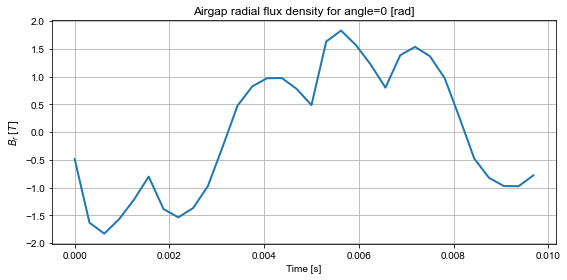

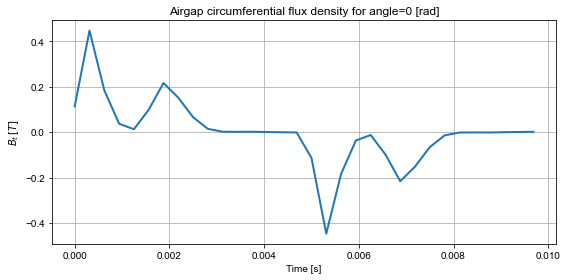

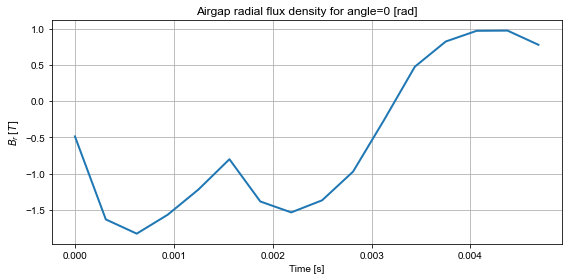

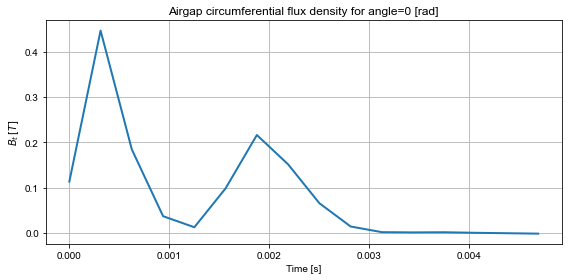

In [13]:
# a=out.mag.B.get_xyz_along('time')
out_femm.mag.B.plot_2D_Data("time[oneperiod]")
a_oneperiod=out_femm.mag.B.get_xyz_along('time[oneperiod]')
a=a_oneperiod['time'][-1]
print(a_oneperiod['time'][-1])
out_femm.mag.B.plot_2D_Data("time[smallestperiod]")
a_smallest=out_femm.mag.B.get_xyz_along('time[smallestperiod]')
b=(a_smallest['time'][-1])
print(a_smallest['time'][-1])
print(a/b)


## Plot

In [ ]:

out_femm.mag.B.plot_2D_Data("angle","time[1]",component_list=["radial"])
out_femm.mag.B.plot_2D_Data("wavenumber=[0,76]","time[1]",component_list=["radial"])
out_femm.mag.Tem.plot_2D_Data("time")

out_femm.mag.B.plot_2D_Data("freqs")
out_femm.mag.B.plot_2D_Data("freqs->elec_order")

c:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\KDH2018-PC\anaconda3\envs\py38_pyleecan_v1\lib\site-packages\SciDataTool\Functions\Plot\plot_2D.py:443: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, 

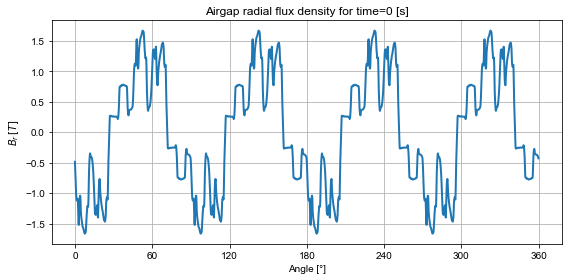

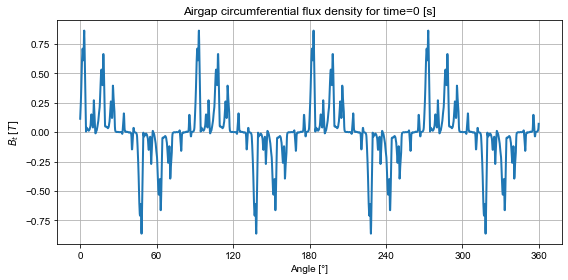

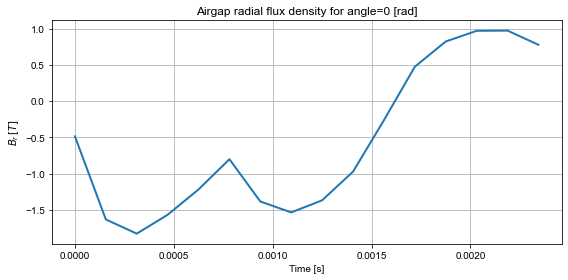

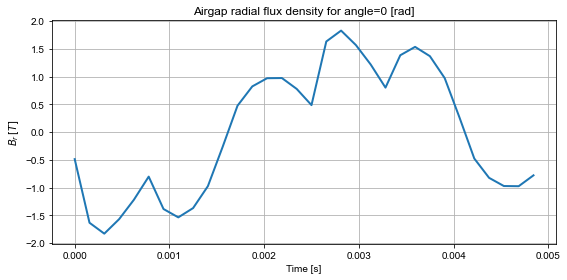

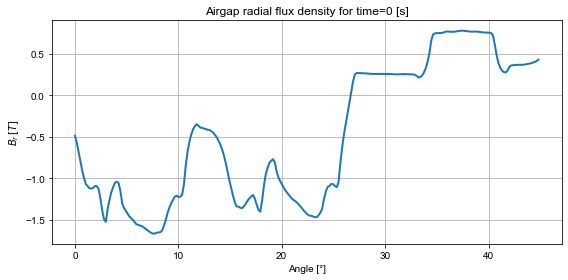

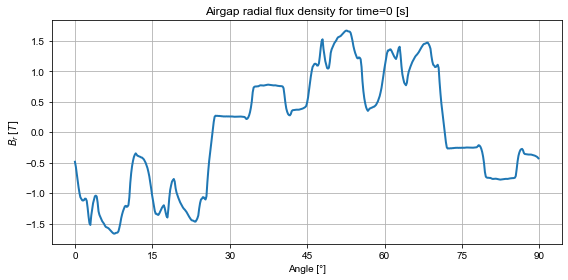

In [297]:
# Radial magnetic flux 
out_femm.mag.B.plot_2D_Data("angle{°}")
#---------------------------------------------------------------
# Plot the field along the smallest period of time
out_femm.mag.B.plot_2D_Data("time[smallestperiod]",component_list=["radial"])
out_femm.mag.B.plot_2D_Data("time[oneperiod]",component_list=["radial"])
# Plot the field along one period of angle
out_femm.mag.B.plot_2D_Data("angle[smallestperiod]{°}",component_list=["radial"])
#---------------------------------------------------------------
out_femm.mag.B.plot_2D_Data("angle[oneperiod]{°}",component_list=["radial"])

## Information regarding operating point

In [260]:

#Information regarding operating point

# simu_femm.input.OP = OPdq(N0=N0)
rpm=10000
rrpm=2000
fre_e=(rrpm/60.)*poles/2

simu_femm.input.OP = OPdq(N0=rpm)
print(simu_femm.input.OP)



parent = <class 'pyleecan.Classes.InputCurrent.InputCurrent'> object
N0 = 10000
felec = None
Tem_av_ref = None
Pem_av_ref = None
Id_ref = None
Iq_ref = None
Ud_ref = None
Uq_ref = None



In [261]:
fre_e=(rpm/60.)*(poles/2)  # electrical frequency [Hz]
fre_r=(rpm/60.)            # mechanical frequency [Hz]
gcd=sym.gcd(poles,slot)    # greatest common divider

# #3 Frequency Calc & GCD Calc ## 

In [262]:
print('electrical frequency :',fre_e, '[Hz]')
print('mechanical frequency :',fre_r, '[Hz]')
print('Greatest common divider, The GCD(', poles, '&', slot, ')=' ,  gcd, '')


electrical frequency : 666.6666666666666 [Hz]
mechanical frequency : 166.66666666666666 [Hz]
Greatest common divider, The GCD( 8 & 48 )= 8 


# #4. Make variable (참조 문법 of python numpy)

In [263]:
u=96
v=96
uu=np.arange(1,u+1) #time
print(type(uu))
print(uu)
vv=np.arange(-v,v+1) #space
print(type(vv))
print(vv)

<class 'numpy.ndarray'>
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96]
<class 'numpy.ndarray'>
[-96 -95 -94 -93 -92 -91 -90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 -79
 -78 -77 -76 -75 -74 -73 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61
 -60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43
 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25
 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7
  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11
  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  

## 4.1 Make uvtable as numpy array

In [272]:
uvtable=np.zeros((uu.size,vv.size),dtype='int') ## initialize array object?

for i in np.arange(uu.size):
    for j in np.arange(vv.size):
        uvtable[i,j]=np.abs(uu[i]*poles+vv[j]*slot)
        # print (i,j,poles,slot,uvtable[i,j])

print('Data type of uvtable is :',type(uvtable))
print('Dimension of table(numpy array) is :',np.shape(uvtable))
print ('Data Value of uvtable is :', uvtable)


Data type of uvtable is : <class 'numpy.ndarray'>
Dimension of table(numpy array) is : (96, 193)
Data Value of uvtable is : [[4600 4552 4504 ... 4520 4568 4616]
 [4592 4544 4496 ... 4528 4576 4624]
 [4584 4536 4488 ... 4536 4584 4632]
 ...
 [3856 3808 3760 ... 5264 5312 5360]
 [3848 3800 3752 ... 5272 5320 5368]
 [3840 3792 3744 ... 5280 5328 5376]]


## 4.2 Make(convert) np.array to pands DataFrame

In [273]:
uvtab=pd.DataFrame(uvtable,columns=vv, index=uu)

print('Data type of uvtable is :',type(uvtab))
print('Dimension of pd.shape :',uvtab.shape)
print ('Data Value of uvtable is :', uvtab)
uvtab

Data type of uvtable is : <class 'pandas.core.frame.DataFrame'>
Dimension of pd.shape : (96, 193)
Data Value of uvtable is :      -96   -95   -94   -93   -92   -91   -90   -89   -88   -87  ...    87  \
1   4600  4552  4504  4456  4408  4360  4312  4264  4216  4168  ...  4184   
2   4592  4544  4496  4448  4400  4352  4304  4256  4208  4160  ...  4192   
3   4584  4536  4488  4440  4392  4344  4296  4248  4200  4152  ...  4200   
4   4576  4528  4480  4432  4384  4336  4288  4240  4192  4144  ...  4208   
5   4568  4520  4472  4424  4376  4328  4280  4232  4184  4136  ...  4216   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
92  3872  3824  3776  3728  3680  3632  3584  3536  3488  3440  ...  4912   
93  3864  3816  3768  3720  3672  3624  3576  3528  3480  3432  ...  4920   
94  3856  3808  3760  3712  3664  3616  3568  3520  3472  3424  ...  4928   
95  3848  3800  3752  3704  3656  3608  3560  3512  3464  3416  ...  4936   
96  3840  3792  3744  3696  

,-96,-95,-94,-93,-92,-91,-90,-89,-88,-87,...,87,88,89,90,91,92,93,94,95,96
1,4600,4552,4504,4456,4408,4360,4312,4264,4216,4168,...,4184,4232,4280,4328,4376,4424,4472,4520,4568,4616
2,4592,4544,4496,4448,4400,4352,4304,4256,4208,4160,...,4192,4240,4288,4336,4384,4432,4480,4528,4576,4624
3,4584,4536,4488,4440,4392,4344,4296,4248,4200,4152,...,4200,4248,4296,4344,4392,4440,4488,4536,4584,4632
4,4576,4528,4480,4432,4384,4336,4288,4240,4192,4144,...,4208,4256,4304,4352,4400,4448,4496,4544,4592,4640
5,4568,4520,4472,4424,4376,4328,4280,4232,4184,4136,...,4216,4264,4312,4360,4408,4456,4504,4552,4600,4648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,3872,3824,3776,3728,3680,3632,3584,3536,3488,3440,...,4912,4960,5008,5056,5104,5152,5200,5248,5296,5344
93,3864,3816,3768,3720,3672,3624,3576,3528,3480,3432,...,4920,4968,5016,5064,5112,5160,5208,5256,5304,5352
94,3856,3808,3760,3712,3664,3616,3568,3520,3472,3424,...,4928,4976,5024,5072,5120,5168,5216,5264,5312,5360
95,3848,3800,3752,3704,3656,3608,3560,3512,3464,3416,...,4936,4984,5032,5080,5128,5176,5224,5272,5320,5368


# #5 공간(spatial order, r) & 시간(temporal order) 차수 구분하여 분석

## 5.1 공간차수(Spatial Order, r)

In [274]:

mmode=np.size(np.unique(np.min(uvtab,1))) 
print('r=',mmode, ':0차 모드(r=0) 다음으로 가장 작은 mode number')
modnum=np.unique(np.min(uvtab,1))[1] # 두번째 작은값
print('r=',modnum, ':그다음 작은값')

r= 4 :0차 모드(r=0) 다음으로 가장 작은 mode number
r= 8 :그다음 작은값



## 5.2 시간차수 (가장 작은 파수(r)에 대한 시간차수에 대해 찾는다.

In [268]:
fslot=np.arange(2*fre_e,8000,2*fre_e) #8000Hz까지의 슬롯주파수
print(fre_e)

print('Data type of fslot is :',type(fslot))
print('Dimension of fslot(numpy array) is :',np.shape(fslot))
print ('슬롯주파수 Data Value of fslot is :', fslot)

666.6666666666666
Data type of fslot is : <class 'numpy.ndarray'>
Dimension of fslot(numpy array) is : (6,)
슬롯주파수 Data Value of fslot is : [1333.33333333 2666.66666667 4000.         5333.33333333 6666.66666667
 8000.        ]


In [147]:
aa=np.unique(np.min(uvtab,1))
bb=np.array(np.min(uvtable,1))

print('Data type of aa is :',type(aa))
print('Dimension of aa(numpy array) is :',np.shape(aa))
print ('슬롯주파수 Data Value of aa is :', aa)

print('Data type of bb is :',type(bb))
print('Dimension of bb(numpy array) is :',np.shape(bb))
print ('슬롯주파수 Data Value of bb is :', bb)

Data type of aa is : <class 'numpy.ndarray'>
Dimension of aa(numpy array) is : (4,)
슬롯주파수 Data Value of aa is : [ 0  8 16 24]
Data type of bb is : <class 'numpy.ndarray'>
Dimension of bb(numpy array) is : (96,)
슬롯주파수 Data Value of bb is : [ 8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0
  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0
  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0
  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0]


In [269]:
color=['r','g','b','k','c','m','y'] #컬러리스트를 만든다.
pcc=[]
for i in bb:
    for j in range(aa.size):
        if i==aa[j]:
            pcc.append(j)
pcc=np.array(pcc)



# #6 Draw Spectrogram using spatial & Temporal Information

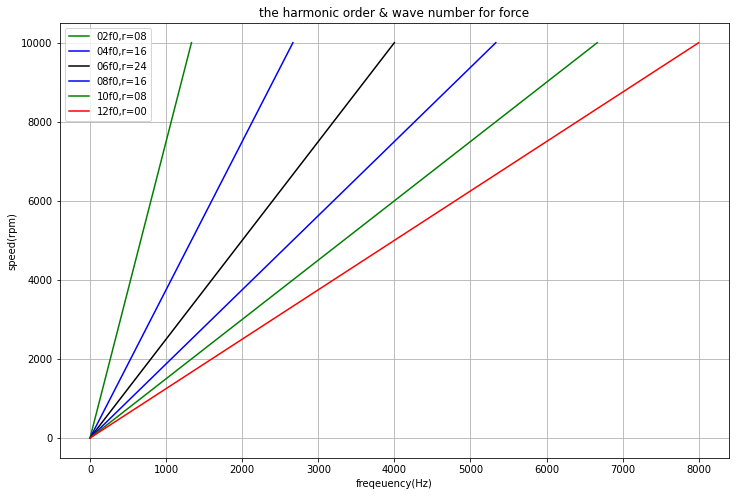

In [270]:
plt.figure(figsize=(12,8))
for i in np.arange(fslot.size):
       if i<=u-1:
            plt.plot([0,fslot[i]],[0, rpm], color[pcc[i]], label='%02df0,r=%02d'% ((i+1)*2, bb[i]))

plt.title(u'the harmonic order & wave number for force')
plt.ylabel(u'speed(rpm)')
plt.xlabel(u'freqeuency(Hz)')
plt.grid('on')
plt.legend()

## 6.1 Add Natural Frequency Vertical Line

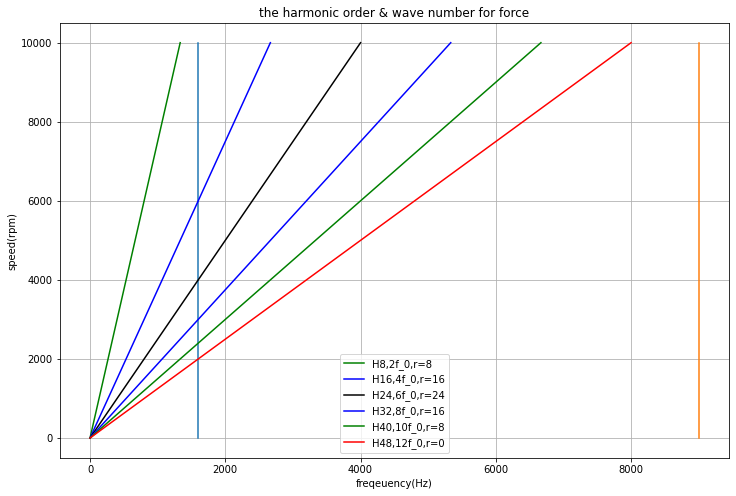

In [271]:
plt.figure(figsize=(12,8))
plt.plot([1600,1600],[0,rpm]) 
plt.plot([9000,9000],[0,rpm])

## Same as above
for i in np.arange(fslot.size):
       if i<=u-1:
            plt.plot([0,fslot[i]],[0, rpm], color[pcc[i]], label='H%0d,%0df_0,r=%0d'% ((i+1)*2*p,(i+1)*2, bb[i]))

plt.title(u'the harmonic order & wave number for force')
plt.ylabel(u'speed(rpm)')
plt.xlabel(u'freqeuency(Hz)')
plt.grid('on')
plt.legend()


# #7 Lowest Temporal Order

In [175]:
## 0을 제외한 가장 낮은 주파수 차수의 Index
print(bb)
np.argwhere(bb==aa[1]).ravel()  ## aa[1]=8
print('0을 제외한 가장 낮은 주파수 차수의 Index:',np.argwhere(bb==aa[1]).ravel() )
low_ord=np.argwhere(bb==aa[1]).ravel()+1
print('0을 제외한 가장 낮은 주파수 차수:',low_ord)
print ('가장 저차를 갖는 주파수:', fre_e*low_ord*2)

[ 8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0
  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0
  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0
  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0  8 16 24 16  8  0]
0을 제외한 가장 낮은 주파수 차수의 Index: [ 0  4  6 10 12 16 18 22 24 28 30 34 36 40 42 46 48 52 54 58 60 64 66 70
 72 76 78 82 84 88 90 94]
0을 제외한 가장 낮은 주파수 차수: [ 1  5  7 11 13 17 19 23 25 29 31 35 37 41 43 47 49 53 55 59 61 65 67 71
 73 77 79 83 85 89 91 95]
가장 저차를 갖는 주파수: [  266.66666667  1333.33333333  1866.66666667  2933.33333333
  3466.66666667  4533.33333333  5066.66666667  6133.33333333
  6666.66666667  7733.33333333  8266.66666667  9333.33333333
  9866.66666667 10933.33333333 11466.66666667 12533.33333333
 13066.66666667 14133.33333333 14666.66666667 15733.33333333
 16266.66666667 17333.33333333 17866.66666667 18933.33333333
 19466.66666667 20533.33333333 21066.66666667 22133.33333333
 22666.66666667 23

In [218]:
#concern_rpm
print ('코깅주파수 차수(기계적한주기):',sym.lcm(poles,slot),'RPM=',rrpm,'일때 주파수(기계적주파수, (RPM/60) [Hz]*Cogging주기)=', rrpm*sym.lcm(poles,slot)/60,'[Hz]')
print ('슬롯하모닉의 차수:',,'슬롯하모닉의 주파수(전기적주파수):', fre_e*slot,'[Hz]')

코깅주파수 차수(기계적한주기): 48 RPM= 2000 일때 주파수(기계적주파수, (RPM/60) [Hz]*Cogging주기)= 1600 [Hz]
슬롯하모닉의 차수: [ 666.66666667 1333.33333333 2000.         2666.66666667 3333.33333333
 4000.         4666.66666667 5333.33333333 6000.         6666.66666667
 7333.33333333] 슬롯하모닉의 주파수(전기적주파수): 6400.0 [Hz]


# Spectrogram from 2D FFT

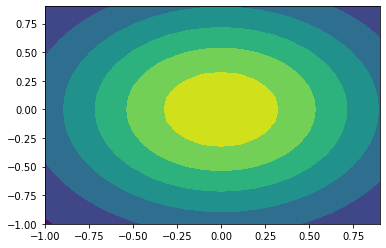

In [276]:
x=np.arange(-1,1,0.1)
y=np.arange(-1,1,0.1)
X,Y=np.meshgrid(x,y)
Z=np.exp(-(X**2+Y**2))
CS=plt.contourf(X,Y,Z)

